## Data Preparation

In [1]:
import nltk
import json
import math
import numpy as np  
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def loadData():
    for line in open('Sarcasm_Headlines_Dataset.json','r'):
        yield eval(line)

In [3]:
Data=list(loadData())

In [4]:
print(Data[0])
print(Data[0]['headline'])
print(Data[0]['is_sarcastic'])    

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
former versace store clerk sues over secret 'black code' for minority shoppers
0


In [5]:
X=[]
Y=[]

In [6]:
for i in range(len(Data)):
    X.append(Data[i]['headline'])
    Y.append(Data[i]['is_sarcastic'])    

In [71]:
print(X[2])
print(Y[2])
#size=len(X)
size=10000

mom starting to fear son's web series closest thing she will have to grandchild
1


## Tokenization Over All

In [72]:
#Tokens
wordsTORemove=[]
tokens=[]
for i in range(size):
    temp=nltk.word_tokenize(X[i])
    for j in range(len(temp)):
        tokens.append(temp[j])

In [73]:
print(len(tokens))

105365


In [74]:
#Decapitalized
tokens=[element.lower() for element in tokens]

In [75]:
#Remove Special characters
removetable=str.maketrans("", "", "'!@#$%^&*()_=-\|][:';:,<.>/?`~0123456789")
tokens=[x.translate(removetable) for x in tokens]

In [76]:
#Importing Stoplist
stopWord=open("Stopword-List.txt").read()
stopWord=nltk.word_tokenize(stopWord)
# Removing StopWords
tokens=[x for x in tokens if x.isalnum() and x not in stopWord]

In [77]:
#word Frequency
fdist=nltk.FreqDist(tokens)

In [78]:
# Unique Tokens 
tokens=list(set(tokens))
print(len(tokens))

16393


In [79]:
#Counting Frequency
#Removing words freq <=3
for words in tokens:
    if(fdist[words]<=3):
        tokens.remove(words)
        wordsTORemove.append(words)

In [80]:
len(tokens)

9343

In [81]:
#Removing Token Tags
tagg=nltk.tag.pos_tag(tokens)
taggs=set()
for word,type1 in tagg:
    if(type1=='NNP' or type1=='FW' or type1=='PRP'):
        taggs.add(word)    

In [82]:
tokens=list(set(tokens)-taggs)

In [83]:
#Removing words with length 2
for words in tokens:
    if len(words)<=2:
        tokens.remove(words)
        wordsTORemove.append(words)

In [84]:
len(tokens)

9206

## Document Wise Tokenization 

In [85]:
#Tokens
docToken=[]
for i in range(size):
    docToken.append(nltk.word_tokenize(X[i]))    

In [86]:
print(docToken[104])

['the', 'top', 'italy', 'tours', 'for', '2015']


In [87]:
#Decaptilized Doc Wise
for x in range(size):
    docToken[x]=[element.lower() for element in docToken[x]]

In [88]:
#Remove Special characters Doc Wise
removetable=str.maketrans("", "", "'!@#$%^&*()_=-\|][:';:,<.>/?`~")
for x in range(size):
    docToken[x]=[y.translate(removetable) for y in docToken[x]]

In [89]:
#removing StopWords
for x in range(size):
    docToken[x]=[y for y in docToken[x] if y.isalnum() and y not in stopWord]

In [90]:
#Removing Token Tags
for x in range(size):
    docToken[x]=list(set(docToken[x])-taggs)

In [91]:
# Counting Frequency
# Removing words freq <=3
for x in range(size):
    for words in docToken[x]:
        if len(words)<=2:
            docToken[x].remove(words)
        elif words in wordsTORemove:
            docToken[x].remove(words)

In [92]:
print(docToken[104])

['top', 'italy', '2015']


## BIGRAM

In [93]:
#bigram=[]
#for i in range(50):
 #   ls=list(nltk.bigrams(docToken[i]))
  #  for j in ls:
   #     bigram.append(list(j))

In [94]:
#len(bigram)

## TF-idf

In [95]:
docV={}
for x in range(size):
    docV[x]=dict.fromkeys(tokens,0) 
    
#Term Frequency in  a document
for x in range(size):
    for word in docToken[x]:
        try:
            docV[x][word]+=1
        except KeyError:
            pass

In [96]:
#Unconnent karna
print(docV[106]['grants'])

1


In [97]:
#tf
tfDocV={}
for x in range(size):
    tfDocV[x]={}
    for word,count in docV[x].items():
        tfDocV[x][word]=count

In [98]:
print(len(tfDocV[1]))

9206


In [99]:
#unique Token Doc wise
for x in range(size):
    docToken[x]=set(docToken[x])
    docToken[x]=list(set(docToken[x]))

In [100]:
wordDcount=dict.fromkeys(tokens,0)

for word in tokens:
    for x in range(size):
        if word in docToken[x]:
            wordDcount[word]+=1

In [101]:
len(wordDcount)

9206

In [102]:
#idf            
idfDict = {}
for word in tokens:
    if wordDcount[word]>0:
        count=wordDcount[word]
        if count>size:
            count=size
    
    if count==0:
        count=1
        
    idfDict[word]=math.log(size/count)        

In [103]:
len(idfDict)

9206

In [ ]:
#tf-idf    
tfidf={}
for x in range(size):
    tfidf[x]={}
    for word in docV[x]:
        tfidf[x][word]=tfDocV[x][word]*idfDict[word]

In [ ]:
print(tfidf[106]['grants'])

In [ ]:
#bigram={}
#for i in range(size):
#    ls=[]
#    for j in range(len(docToken[i])-1):
#        for k in range(j,len(docToken[i])-1):
#            ls.append([docToken[i][j],docToken[i][k+1]])
        
#    bigram[i]=ls

In [ ]:
#bigram[104]

In [ ]:
#bigramVal={}
#for i in range(size):
#    bigramVal[i]={}
#    for x in range(len(bigram[i])):  
#        try:
#            bigramVal[i][bigram[i][x][0]+" "+bigram[i][x][1]]=tfidf[i][bigram[i][x][0]]+tfidf[i][bigram[i][x][1]]
#        except KeyError:
#            pass

In [ ]:
#Max3=[]
#for x in range(size):
#    Max3.append(sorted(bigramVal[x],key=bigramVal[x].get, reverse=True)[:3])

In [ ]:
#Max3[104]

In [ ]:
#len(tfidf)

In [ ]:
df=pd.DataFrame(tfidf)
df=np.transpose(df)

In [ ]:
#df.to_csv('pData.csv')

In [ ]:
#df_csv = pd.read_csv('pData')

In [ ]:
scaler=StandardScaler()
#scaler=MinMaxScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [ ]:
scaled_data

In [ ]:
pca=PCA(n_components=500)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [ ]:
print(scaled_data.shape)
print(x_pca.shape)

In [ ]:
#kmeans = KMeans(n_clusters=10,random_state=20).fit(x_pca)

In [ ]:
#x_pca

In [ ]:
#result = np.hstack((x_pca, np.atleast_2d(kmeans.labels_).T)) 

In [ ]:
#result

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, Y[:size],test_size=0.20,random_state=42)

In [ ]:
clf = svm.SVC(coef0=1.0,random_state=20)
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
##Test
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
print(sum(pca.explained_variance_ratio_))

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(x_pca[:,0],x_pca[:,1],c=Y[0:size])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [69]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

ValueError: X.shape[1] = 2 should be equal to 500, the number of features at training time

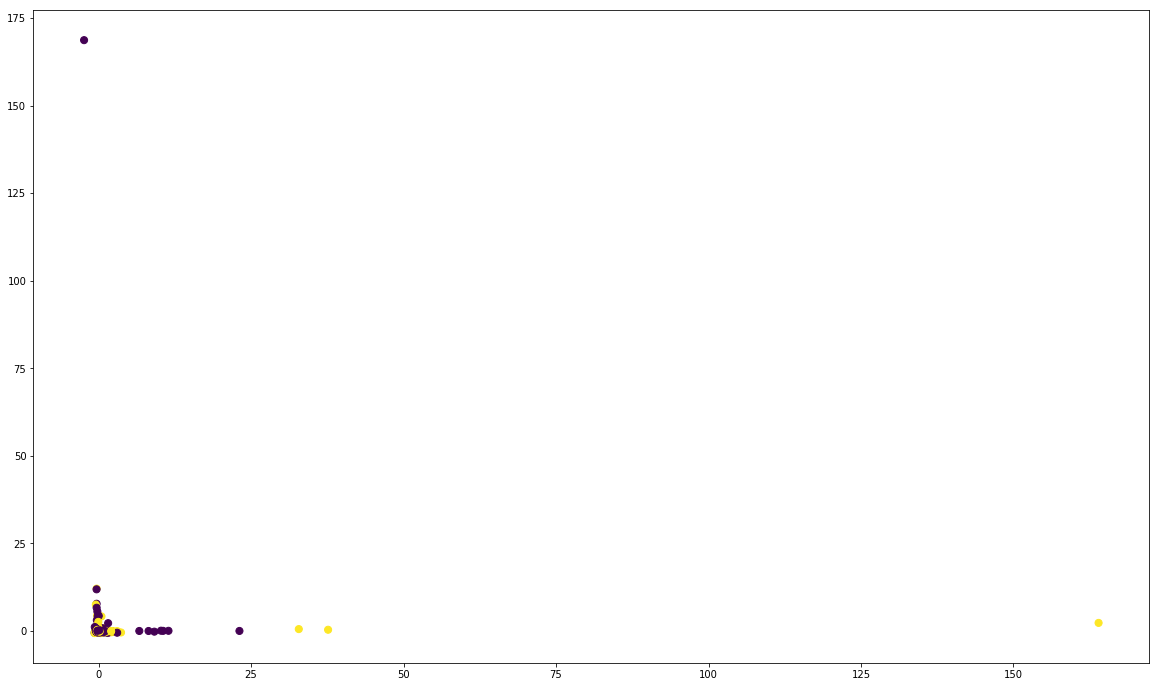

In [70]:
plt.figure(figsize=(20,12))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50)

plot_svc_decision_function(clf);